Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [7]:
!cp /content/gdrive/MyDrive/CNN_assignment.zip .
!unzip CNN_assignment.zip

Archive:  CNN_assignment.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  
  inflating: Skin cancer ISIC The I

In [8]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [9]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [10]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [11]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,seed=123,image_size=(img_height,img_width),batch_size=batch_size,  label_mode='categorical'
)

Found 2239 files belonging to 9 classes.


In [12]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_test,seed=123,image_size=(img_height,img_width),batch_size=batch_size,  label_mode='categorical'
)

Found 118 files belonging to 9 classes.


In [13]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

### your code goes here, you can use training or validation data to visualize

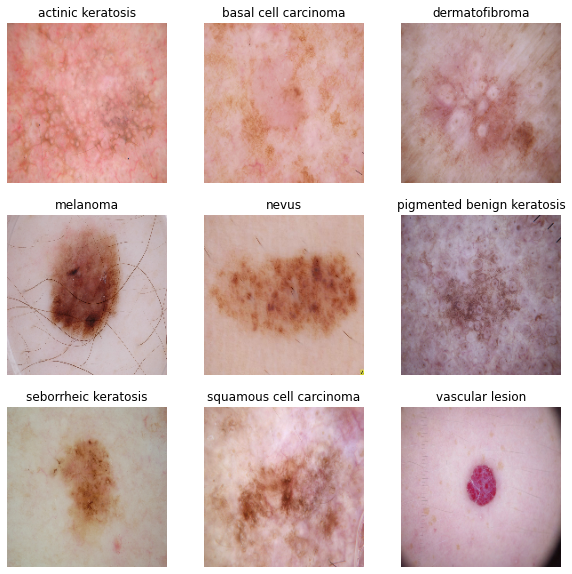

In [15]:
plt.figure(figsize=(10, 10))

labels_imgs = {} #dictionary to store one image of each cancer type

#Taking one image of each cancer type and storing it in dictionary
while True:
  for images, labels in train_ds.take(1):
    for i in range(9):
      labels_imgs[class_names[np.argmax(labels[i])]] = images[i].numpy().astype("uint8")
  if len(labels_imgs) == 9:
    break


for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(labels_imgs[class_names[i]])
  plt.title(class_names[i])
  plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [20]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [21]:
data_augmentation = keras.Sequential(
    [
     ##No data augmentation to start with
    ]
)

In [22]:
### Your code goes here
inputs = keras.Input(shape=(img_height,img_width,3,))
x = data_augmentation(inputs)
x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(x)
x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Conv2D(64, 3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.SeparableConv2D(1024, 3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(9, activation="softmax")(x)

In [23]:
model = keras.Model(inputs, outputs)

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [24]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer=keras.optimizers.Adam(1e-3),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [25]:
# View the summary of all layers
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
sequential (Sequential)      multiple                  0         
_________________________________________________________________
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 90, 90, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 90, 90, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 64)        18496 

### Train the model

In [26]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
211/211 [==============================] - 1303s 400ms/step - loss: 1.7091 - accuracy: 0.3489 - val_loss: 2.1786 - val_accuracy: 0.1356
Epoch 2/20
211/211 [==============================] - 48s 229ms/step - loss: 1.5577 - accuracy: 0.4070 - val_loss: 2.0744 - val_accuracy: 0.1610
Epoch 3/20
211/211 [==============================] - 48s 228ms/step - loss: 1.5004 - accuracy: 0.4297 - val_loss: 1.8956 - val_accuracy: 0.2712
Epoch 4/20
211/211 [==============================] - 48s 226ms/step - loss: 1.4601 - accuracy: 0.4456 - val_loss: 2.2897 - val_accuracy: 0.2797
Epoch 5/20
211/211 [==============================] - 48s 227ms/step - loss: 1.4141 - accuracy: 0.4622 - val_loss: 2.3930 - val_accuracy: 0.3051
Epoch 6/20
211/211 [==============================] - 48s 227ms/step - loss: 1.3903 - accuracy: 0.4713 - val_loss: 2.5811 - val_accuracy: 0.3898
Epoch 7/20
211/211 [==============================] - 48s 227ms/step - loss: 1.3575 - accuracy: 0.4838 - val_loss: 3.0884 - val_

### Visualizing training results

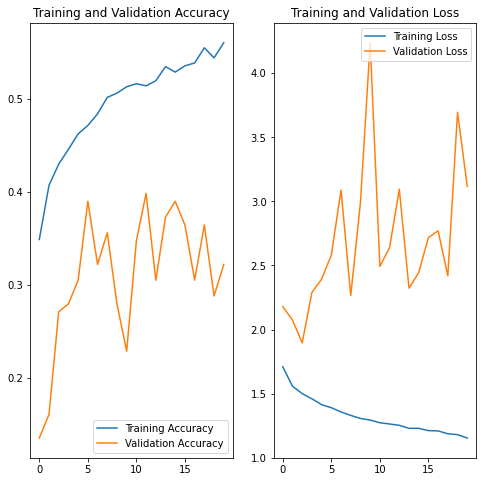

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

##  Findings 

1.   Training loss is decreasing but validation is still high.
2.   Accuracy is low on both train and validation set.
3.   Model is underfitted



In [29]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

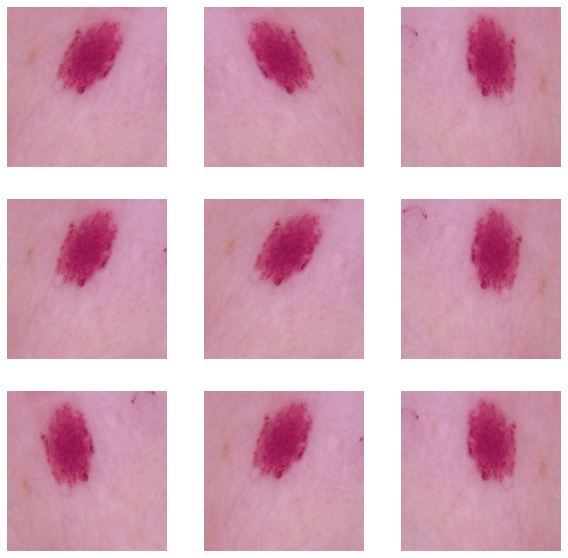

In [30]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [43]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
inputs = keras.Input(shape=(img_height,img_width,3,))
x = data_augmentation(inputs)
x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(x)
x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Dropout(0.55)(x)
x = layers.Conv2D(64, 3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Dropout(0.55)(x)

previous_block_activation = x  # Set aside residual

for size in [32, 64, 128, 256, 512, 1024]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.55)(x)


        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)


        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)


        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)


        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Adding back the residual
        previous_block_activation = x  # Set aside next residual

x = layers.SeparableConv2D(1024, 3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.55)(x)
outputs = layers.Dense(9, activation="softmax")(x)

model = keras.Model(inputs,outputs)


### Compiling the model

In [44]:
## Your code goes here
model.compile(optimizer=keras.optimizers.Adam(1e-3),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [45]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 180, 180, 3) 0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 180, 180, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
rescaling_4 (Rescaling)         (None, 180, 180, 3)  0           sequential_1[3][0]               
__________________________________________________________________________________________________
conv2d_26 (Conv2D)              (None, 90, 90, 32)   896         rescaling_4[0][0]                
____________________________________________________________________________________________

### Training the model

In [46]:
## Your code goes here, note: train your model for 20 epochs

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
211/211 [==============================] - 56s 250ms/step - loss: 1.8311 - accuracy: 0.3294 - val_loss: 2.2111 - val_accuracy: 0.1356
Epoch 2/20
211/211 [==============================] - 52s 248ms/step - loss: 1.5770 - accuracy: 0.4078 - val_loss: 2.1918 - val_accuracy: 0.1610
Epoch 3/20
211/211 [==============================] - 53s 250ms/step - loss: 1.4760 - accuracy: 0.4333 - val_loss: 2.6048 - val_accuracy: 0.3051
Epoch 4/20
211/211 [==============================] - 53s 249ms/step - loss: 1.4165 - accuracy: 0.4498 - val_loss: 2.0848 - val_accuracy: 0.3136
Epoch 5/20
211/211 [==============================] - 53s 248ms/step - loss: 1.4009 - accuracy: 0.4564 - val_loss: 2.3995 - val_accuracy: 0.3390
Epoch 6/20
211/211 [==============================] - 52s 246ms/step - loss: 1.3634 - accuracy: 0.4824 - val_loss: 2.8997 - val_accuracy: 0.2966
Epoch 7/20
211/211 [==============================] - 52s 249ms/step - loss: 1.3124 - accuracy: 0.5029 - val_loss: 1.9061 - val_ac

In [48]:
## Your code goes here, note: train your model for 20 epochs

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
211/211 [==============================] - 52s 248ms/step - loss: 0.8281 - accuracy: 0.6853 - val_loss: 2.7295 - val_accuracy: 0.4153
Epoch 2/20
211/211 [==============================] - 52s 247ms/step - loss: 0.8002 - accuracy: 0.6946 - val_loss: 2.8019 - val_accuracy: 0.3729
Epoch 3/20
211/211 [==============================] - 52s 248ms/step - loss: 0.7721 - accuracy: 0.7065 - val_loss: 2.4997 - val_accuracy: 0.4576
Epoch 4/20
211/211 [==============================] - 52s 248ms/step - loss: 0.7526 - accuracy: 0.7228 - val_loss: 2.6227 - val_accuracy: 0.4746
Epoch 5/20
211/211 [==============================] - 52s 248ms/step - loss: 0.7389 - accuracy: 0.7154 - val_loss: 2.6667 - val_accuracy: 0.3814
Epoch 6/20
211/211 [==============================] - 52s 247ms/step - loss: 0.7120 - accuracy: 0.7305 - val_loss: 2.7023 - val_accuracy: 0.4492
Epoch 7/20
211/211 [==============================] - 53s 249ms/step - loss: 0.6799 - accuracy: 0.7373 - val_loss: 3.8814 - val_ac

### Visualizing the results

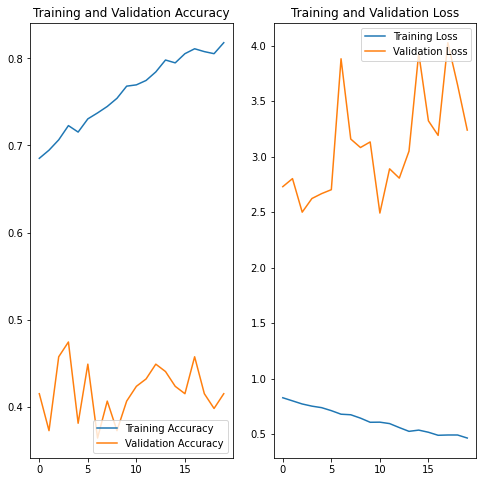

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Findings
1. Training accuracy is very High
2. Validation accuracy is very Low
3. Model is overfitted

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [21]:
## Your code goes here.
res = list(zip(*train_ds.unbatch().as_numpy_iterator()))
x_train = np.array(res[0])
y_train = np.array(res[1])
print(x_train.shape,y_train.shape)
unique, counts = np.unique(np.argmax(y_train,axis=1), return_counts=True)
sparse_classes = []
for n in (zip(class_names,counts)):
  print(n)
  if n[1] < 350:
    sparse_classes.append(n[0])

(2239, 180, 180, 3) (2239, 9)
('actinic keratosis', 114)
('basal cell carcinoma', 376)
('dermatofibroma', 95)
('melanoma', 438)
('nevus', 357)
('pigmented benign keratosis', 462)
('seborrheic keratosis', 77)
('squamous cell carcinoma', 181)
('vascular lesion', 139)


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
**'seborrheic keratosis'**
#### - Which classes dominate the data in terms proportionate number of samples?
**Top Three Classes Are**


1.   Pigmented benign keratosis
2.   Melanoma
3.   Basal cell carcinoma


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [23]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [24]:
!cp -r "/content/Skin cancer ISIC The International Skin Imaging Collaboration" /content/Skin_Augmented

In [25]:
path_to_training_dataset="/content/Skin_Augmented/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to /content/Skin_Augmented/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5049B796D0>: 100%|██████████| 500/500 [00:16<00:00, 31.13 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F504DF14E50>:   0%|          | 1/500 [00:00<00:50,  9.96 Samples/s]

Initialised with 376 image(s) found.
Output directory set to /content/Skin_Augmented/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F5049B38CD0>: 100%|██████████| 500/500 [00:15<00:00, 32.37 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to /content/Skin_Augmented/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F504DEA6290>: 100%|██████████| 500/500 [00:15<00:00, 31.48 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to /content/Skin_Augmented/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F5049BA6ED0>: 100%|██████████| 500/500 [01:22<00:00,  6.06 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to /content/Skin_Augmented/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7F5049B79150>: 100%|██████████| 500/500 [01:20<00:00,  6.18 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to /content/Skin_Augmented/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F504DE69550>: 100%|██████████| 500/500 [00:16<00:00, 31.07 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to /content/Skin_Augmented/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F5068031B10>: 100%|██████████| 500/500 [00:37<00:00, 13.25 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to /content/Skin_Augmented/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F5049B38290>: 100%|██████████| 500/500 [00:15<00:00, 33.14 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to /content/Skin_Augmented/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F504E01AF10>: 100%|██████████| 500/500 [00:15<00:00, 32.00 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [26]:
!sudo pip3 install glob3
from glob import glob

ERROR: Could not find a version that satisfies the requirement glob3 (from versions: none)
ERROR: No matching distribution found for glob3


In [27]:
## OLD Dataset
data_dir_train = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test/")


In [28]:
path_list_old = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
path_list_old

['/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0032613.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0029578.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0025504.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0028651.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0032247.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0026254.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0027141.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0033790.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/IS

In [29]:
lesion_list_old = [os.path.basename((os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list_old

['dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofib

In [30]:
dataframe_dict_old = dict(zip(path_list_old, lesion_list_old))
original_df = pd.DataFrame(list(dataframe_dict_old.items()),columns = ['Path','Label'])
original_df.head()

,Path,Label
0,/content/Skin cancer ISIC The International Sk...,dermatofibroma
1,/content/Skin cancer ISIC The International Sk...,dermatofibroma
2,/content/Skin cancer ISIC The International Sk...,dermatofibroma
3,/content/Skin cancer ISIC The International Sk...,dermatofibroma
4,/content/Skin cancer ISIC The International Sk...,dermatofibroma


In [31]:
##NEW Augmented Dataset
data_dir_train = pathlib.Path("/content/Skin_Augmented/Train/")
data_dir_test = pathlib.Path("/content/Skin_Augmented/Test/")

image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [32]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['/content/Skin_Augmented/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0033810.jpg_ce9dd4f7-bf41-42bb-92f6-e818f53eb713.jpg',
 '/content/Skin_Augmented/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0030442.jpg_563b5142-ea37-441b-9b1b-4b150dcf0713.jpg',
 '/content/Skin_Augmented/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0030015.jpg_3ff1e64c-fccc-4023-865d-bac34842bf3d.jpg',
 '/content/Skin_Augmented/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0032468.jpg_c7adc16b-8313-4074-9f3c-e0ab55d48589.jpg',
 '/content/Skin_Augmented/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0031257.jpg_1a931c2c-c05d-4a90-af77-27f48bde4a71.jpg',
 '/content/Skin_Augmented/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0025980.jpg_cd2a678c-c893-4689-9b73-950c8b6f0f15.jpg',
 '/content/Skin_Augmented/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0027107.jpg_70c4d76d-ea22-4773-9c75-9010dcd2756c.jpg',
 '/content/Skin_Augmented/Train/de

In [33]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofib

In [34]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [35]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
df2.head()

,Path,Label
0,/content/Skin_Augmented/Train/dermatofibroma/o...,dermatofibroma
1,/content/Skin_Augmented/Train/dermatofibroma/o...,dermatofibroma
2,/content/Skin_Augmented/Train/dermatofibroma/o...,dermatofibroma
3,/content/Skin_Augmented/Train/dermatofibroma/o...,dermatofibroma
4,/content/Skin_Augmented/Train/dermatofibroma/o...,dermatofibroma


In [36]:
new_df = original_df.append(df2)

In [37]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

In [38]:
## Putting images from output folder to class folder
for img in path_list_new:
  os.rename(img,img.replace("output/",""))

#### **Todo**: Train the model on the data created using Augmentor

In [39]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [40]:
data_dir_train="/content/Skin_Augmented/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.3,
  subset = "training",label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 4718 files for training.


#### **Todo:** Create a validation dataset

In [41]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.3,
  subset = "validation",label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 2021 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [43]:
## your code goes here
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomCrop(100,100),
     layers.experimental.preprocessing.RandomZoom(0.3,0.3)

    ]
)


inputs = keras.Input(shape=(img_height,img_width,3,))
x = data_augmentation(inputs)
x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(x)
x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Conv2D(64, 3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Conv2D(128, 3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Conv2D(256, 3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Dropout(0.3)(x)

previous_block_activation = x  # Set aside residual

for size in [32, 64, 128, 256]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Adding back the residual
        previous_block_activation = x  # Set aside next residual

x = layers.SeparableConv2D(1024, 3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(9, activation="softmax")(x)

model = keras.Model(inputs,outputs)


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [44]:
## your code goes here
model.compile(optimizer=keras.optimizers.Adam(1e-3),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [45]:
epochs = 50
## Your code goes here, use 50 epochs.
history = history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
148/148 [==============================] - 69s 240ms/step - loss: 1.7311 - accuracy: 0.3610 - val_loss: 2.1947 - val_accuracy: 0.1321
Epoch 2/50
148/148 [==============================] - 35s 231ms/step - loss: 1.6123 - accuracy: 0.3877 - val_loss: 2.3077 - val_accuracy: 0.1465
Epoch 3/50
148/148 [==============================] - 35s 235ms/step - loss: 1.5645 - accuracy: 0.4152 - val_loss: 1.9300 - val_accuracy: 0.2538
Epoch 4/50
148/148 [==============================] - 35s 232ms/step - loss: 1.5278 - accuracy: 0.4258 - val_loss: 1.6185 - val_accuracy: 0.3770
Epoch 5/50
148/148 [==============================] - 35s 234ms/step - loss: 1.4762 - accuracy: 0.4377 - val_loss: 1.7542 - val_accuracy: 0.3667
Epoch 6/50
148/148 [==============================] - 35s 234ms/step - loss: 1.4888 - accuracy: 0.4373 - val_loss: 1.5801 - val_accuracy: 0.4191
Epoch 7/50
148/148 [==============================] - 35s 234ms/step - loss: 1.4506 - accuracy: 0.4460 - val_loss: 1.6134 - val_ac

#### **Todo:**  Visualize the model results

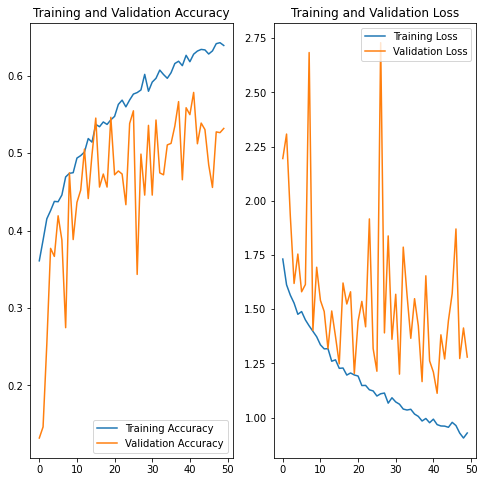

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



1. Model is giving good accuracy now.
2. If we train it for more epochs we will get better accuracy
3. Overfitting problem is resolved.
